# 📊 Test Exploratory Data Analysis — Social Media Sentiment Insights

**Objective:**  
Understand the dataset structure, detect missing values, explore distributions and early patterns to guide future modeling or insights presentation.

---

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual settings
pd.set_option("display.max_colwidth", 120)
plt.style.use("default")

print("✅ Libraries loaded correctly.")

✅ Libraries loaded correctly.


## 📥 1. Load Dataset & Initial Overview

We'll load the dataset and quickly explore its structure to understand the number of rows, columns, and get a glimpse of the data.

In [117]:
# Load dataset
df = pd.read_csv("../data/sentimentdataset.csv")
print("✅ Dataset loaded. Shape:", df.shape)

# Quick peek
df.head(30)

✅ Dataset loaded. Shape: (732, 15)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in life.,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot cocoa.,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch!,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timeline.,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days.,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [119]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [120]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [121]:
df.nunique()

Unnamed: 0.1    732
Unnamed: 0      732
Text            707
Sentiment       279
Timestamp       683
User            685
Platform          4
Hashtags        697
Retweets         26
Likes            38
Country         115
Year             14
Month            12
Day              31
Hour             22
dtype: int64

In [122]:
df.sort_values(by="Likes", ascending=False).head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
570,571,575,"Underneath the city lights, the dancer expresses emotions through graceful movements, creating a mesmerizing perform...",Mesmerizing,2018-06-15 22:00:00,DanceEnthusiastCityNightPerformance,Twitter,#Mesmerizing #NightDancePerformance,40.0,80.0,USA,2018,6,15,22
345,346,350,Motivated to achieve fitness goals after an invigorating workout.,Motivation,2022-02-28 07:15:00,FitnessJunkie,Facebook,#Motivation #FitnessGoals,40.0,80.0,Australia,2022,2,28,7
368,369,373,Elation over discovering a rare book in a quaint bookstore.,Elation,2018-09-22 16:30:00,Bookworm,Instagram,#Elation #RareBookDiscovery,40.0,80.0,USA,2018,9,22,16
560,561,565,"In the serene beauty of a sunset, nature unfolds a canvas of colors, evoking a sense of tranquility and wonder.",Tranquility,2021-07-10 19:00:00,NatureEnthusiastSunsetWonder,Instagram,#Tranquility #SunsetBeauty,40.0,80.0,Canada,2021,7,10,19
382,383,387,A sense of wonder at the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.0,80.0,South Africa,2018,7,8,23
355,356,360,Anticipation for an upcoming adventure in an exotic destination.,Anticipation,2022-07-25 10:00:00,Wanderlust,Twitter,#Anticipation #AdventureAwaits,40.0,80.0,India,2022,7,25,10
335,336,340,Thrilled to witness the grandeur of a cultural festival.,Thrill,2020-09-15 14:45:00,CultureEnthusiast,Instagram,#Thrill #CulturalCelebration,40.0,80.0,India,2020,9,15,14
432,433,437,"Heartache deepens, a solitary journey through the abyss of despair.",Despair,2022-08-18 22:00:00,SolitaryDescent,Instagram,#Despair #AbyssOfHeartache,40.0,80.0,South Africa,2022,8,18,22
402,403,407,Awe-inspired by the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.0,80.0,South Africa,2018,7,8,23
470,471,475,"Dancing on sunshine, each step a celebration of the joy found in simple moments.",Joy,2021-08-20 15:45:00,SunshineDancer,Instagram,#Joy #SimpleMoments,40.0,80.0,USA,2021,8,20,15


In [123]:
df.sort_values(by="Retweets", ascending=False).head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
560,561,565,"In the serene beauty of a sunset, nature unfolds a canvas of colors, evoking a sense of tranquility and wonder.",Tranquility,2021-07-10 19:00:00,NatureEnthusiastSunsetWonder,Instagram,#Tranquility #SunsetBeauty,40.0,80.0,Canada,2021,7,10,19
540,541,545,"Celebrating a historic victory in the World Cup, the nation erupts in joy, united by the triumph of their football t...",Joy,2018-07-15 21:30:00,FootballFanWorldCupCelebration,Instagram,#Joy #WorldCupTriumph,40.0,80.0,Brazil,2018,7,15,21
570,571,575,"Underneath the city lights, the dancer expresses emotions through graceful movements, creating a mesmerizing perform...",Mesmerizing,2018-06-15 22:00:00,DanceEnthusiastCityNightPerformance,Twitter,#Mesmerizing #NightDancePerformance,40.0,80.0,USA,2018,6,15,22
550,551,555,"After a series of defeats, the soccer team faces disappointment, struggling to find the silver lining in a challengi...",Disappointment,2019-11-02 18:45:00,SoccerFanTeamDefeats,Twitter,#Disappointment #SoccerDefeats,40.0,80.0,Brazil,2019,11,2,18
510,511,515,"At the front row of Adele's concert, each note of 'Someone Like You' resonates with soul-stirring emotion.",Emotion,2022-09-15 20:00:00,AdeleConcertGoer,Instagram,#Emotion #AdeleConcert,40.0,80.0,USA,2022,9,15,20
530,531,535,"Captivated by the spellbinding plot twists, the audience applauds, experiencing a rollercoaster of emotions at the m...",Excitement,2018-10-12 20:00:00,MovieEnthusiastPremiereAttendee,Twitter,#Excitement #MoviePremiereThrills,40.0,80.0,USA,2018,10,12,20
520,521,525,"At a Justin Bieber concert, the infectious beats of 'Baby' create a dance floor of unbridled enthusiasm.",Enthusiasm,2018-08-05 20:00:00,BieberDanceEnthusiast,Instagram,#Enthusiasm #JustinBieber,40.0,80.0,Canada,2018,8,5,20
481,482,486,"Surrounded by the colors of joy, a canvas painted with laughter and endless smiles.",Joy,2019-07-02 17:00:00,ColorfulLaughter,Instagram,#Joy #EndlessSmiles,40.0,80.0,Canada,2019,7,2,17
402,403,407,Awe-inspired by the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.0,80.0,South Africa,2018,7,8,23
382,383,387,A sense of wonder at the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.0,80.0,South Africa,2018,7,8,23


In [124]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_corr = df.corr(numeric_only=True).round(2)
df_corr.style.format("{:.2f}").background_gradient(cmap="coolwarm")
# df.corr(numeric_only=True)

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
Unnamed: 0.1,1.00,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Unnamed: 0,1.00,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Retweets,0.39,0.39,1.00,1.00,-0.04,0.07,0.01,0.20
Likes,0.38,0.38,1.00,1.00,-0.04,0.07,0.01,0.20
Year,0.10,0.10,-0.04,-0.04,1.00,-0.31,0.02,-0.09
Month,0.44,0.44,0.07,0.07,-0.31,1.00,-0.14,0.14
Day,-0.08,-0.08,0.01,0.01,0.02,-0.14,1.00,0.04
Hour,0.32,0.32,0.20,0.20,-0.09,0.14,0.04,1.00


Unnamed data should be removed
Total correlation between likes and retweets

In [125]:
df_corr = df.corr(numeric_only=True).round(2)
df_corr.style.format("{:.2f}").background_gradient(cmap="magma")

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
Unnamed: 0.1,1.00,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Unnamed: 0,1.00,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Retweets,0.39,0.39,1.00,1.00,-0.04,0.07,0.01,0.20
Likes,0.38,0.38,1.00,1.00,-0.04,0.07,0.01,0.20
Year,0.10,0.10,-0.04,-0.04,1.00,-0.31,0.02,-0.09
Month,0.44,0.44,0.07,0.07,-0.31,1.00,-0.14,0.14
Day,-0.08,-0.08,0.01,0.01,0.02,-0.14,1.00,0.04
Hour,0.32,0.32,0.20,0.20,-0.09,0.14,0.04,1.00


When applying a background gradient, especially in data visualization libraries like Pandas or Matplotlib, the cmap argument (colormap) specifies the color scheme to be used. While coolwarm provides a diverging colormap ranging from cool blues to warm reds, many other options exist, each with a distinct aesthetic and purpose.
Here are some categories of colormaps and examples of other colors you could use:
1. Sequential Colormaps: These colormaps are designed to show a progression of values, typically from low to high, using a single hue or a gradual change in lightness/saturation.
Examples: viridis, plasma, inferno, magma, gray, Blues, Greens, Reds, Purples, Oranges.
2. Diverging Colormaps: Similar to coolwarm, these colormaps emphasize a central neutral value and diverge to two distinct colors at the extremes, suitable for showing deviations from a mean or a zero point.
Examples: seismic, RdBu, PiYG, PRGn, BrBG, bwr.
3. Qualitative Colormaps: These colormaps are designed to distinguish between discrete categories or groups, using distinct and easily differentiable colors.
Examples: tab10, tab20, Paired, Set1, Set2, Dark2.
4. Cyclic Colormaps: These colormaps are useful for data that wraps around a central point, like angles or phases, where the start and end colors are the same or very similar.
Examples: twilight, hsv.
To choose the best colormap, consider:
Data Type: Is your data sequential, diverging, or categorical?
Clarity: Does the colormap effectively convey the information without causing misinterpretations?
Accessibility: Is the colormap colorblind-friendly? (e.g., viridis is often recommended for this).
Aesthetics: Does the colormap align with the overall design and purpose of your visualization?

In [126]:
df['text_len'] = df['Text'].str.len()
df['word_count'] = df['Text'].str.split().str.len()
df['hashtag_count'] = df['Hashtags'].str.count('#')
df['emoji_count'] = df['Text'].str.count(r'[^\w\s,]')  # emojis/símbolos

df[['text_len', 'word_count', 'hashtag_count', 'emoji_count', 'Likes', 'Retweets']].corr()

,text_len,word_count,hashtag_count,emoji_count,Likes,Retweets
text_len,1.000000,0.941527,NaN,0.351973,0.186922,0.188660
word_count,0.941527,1.000000,NaN,0.261845,0.196229,0.197125
hashtag_count,NaN,NaN,NaN,NaN,NaN,NaN
emoji_count,0.351973,0.261845,NaN,1.000000,0.174394,0.181458
Likes,0.186922,0.196229,NaN,0.174394,1.000000,0.998482
Retweets,0.188660,0.197125,NaN,0.181458,0.998482,1.000000


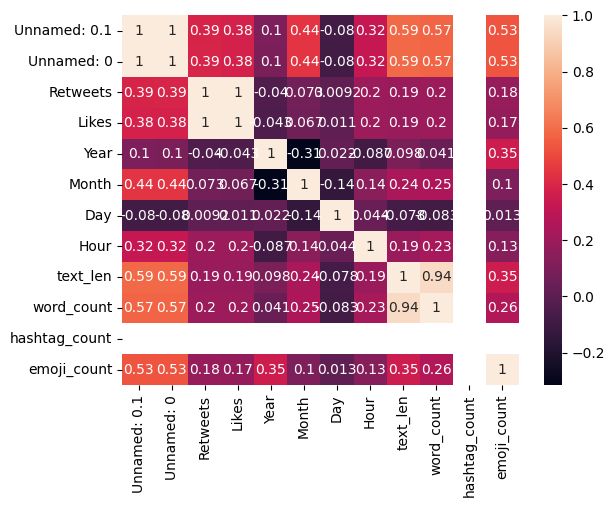

In [127]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

In [104]:
df_groupby = df.groupby('Platform')[['Likes', 'Retweets']].mean().sort_values(by='Likes', ascending=False)
df_groupby.style.format("{:.1f}")

,Likes,Retweets
Platform,,
Twitter,45.4,22.8
Instagram,45.1,22.6
Facebook,41.9,21.0
Twitter,37.3,18.7


In [105]:
df['Country'].value_counts()


Country
USA           59
USA           55
UK            49
Canada        44
Australia     41
              ..
Ireland        1
Scotland       1
Kenya          1
Jamaica        1
Thailand       1
Name: count, Length: 115, dtype: int64

Strings might have empty values and that messes up de 'country' data

In [106]:
df['Country'].value_counts(normalize=True) * 100

Country
USA           8.060109
USA           7.513661
UK            6.693989
Canada        6.010929
Australia     5.601093
                ...   
Ireland       0.136612
Scotland      0.136612
Kenya         0.136612
Jamaica       0.136612
Thailand      0.136612
Name: proportion, Length: 115, dtype: float64

In [107]:
df.groupby('Country')[['Likes', 'Retweets', 'emoji_count', 'word_count']].mean().sort_values(by='Likes', ascending=False)

,Likes,Retweets,emoji_count,word_count
Country,,,,
India,80.000000,40.0,1.0,9.000000
South Africa,80.000000,40.0,1.5,12.500000
Belgium,70.000000,35.0,1.0,10.500000
Japan,70.000000,35.0,1.0,12.000000
Netherlands,70.000000,35.0,1.0,17.000000
...,...,...,...,...
Canada,25.000000,12.0,2.0,6.000000
Australia,24.200000,12.0,1.2,11.000000
Canada,21.666667,11.0,1.0,10.666667


In [108]:
df_groupby = df.groupby('Sentiment')[['Likes', 'Retweets']].mean().sort_values(by='Retweets', ascending=False)
df_groupby.style.format("{:.1f}")

,Likes,Retweets
Sentiment,,
Wonder,80.0,40.0
Wonder,80.0,40.0
Motivation,80.0,40.0
Mesmerizing,80.0,40.0
Anticipation,80.0,40.0
Thrill,80.0,40.0
Resilience,70.0,35.0
Resilience,70.0,35.0
Wonderment,70.0,35.0


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# --- CLEANUP ---
# Clean the 'Platform' column to avoid duplicates like 'Twitter ' vs 'twitter'
df["Platform"] = df["Platform"].astype(str).str.strip().str.title()


In [111]:

print(df.head())
print(df.shape)

df.drop(columns='Unnamed: 0.1', inplace=True)
df.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
df.isnull().sum()
df.dtypes

df["Platform"] = df["Platform"].astype(str).str.strip().str.title()
top10_sentiments = df["Sentiment"].value_counts().head(10).index
df_platform = df[df["Sentiment"].isin(top10_sentiments)].copy()

print("Platforms in dataset:", df_platform["Platform"].unique())


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                   Text    Sentiment  \
0   Enjoying a beautiful day at the park!                 Positive     
1   Traffic was terrible this morning.                    Negative     
2    Just finished an amazing workout! 💪                  Positive     
3   Excited about the upcoming weekend getaway!           Positive     
4   Trying out a new recipe for dinner tonight.           Neutral      

             Timestamp            User   Platform  \
0  2023-01-15 12:30:00   User123          Twitter   
1  2023-01-15 08:45:00   CommuterX        Twitter   
2  2023-01-15 15:45:00   FitnessFan     Instagram   
3  2023-01-15 18:20:00   AdventureX      Facebook   
4  2023-01-15 19:55:00   ChefCook       Instagram   

                                     Hashtags  Retweets  Like

In [ ]:

# --- Clean Platform ---
print("\nCleaning Platform column...")
df["Platform"] = df["Platform"].astype(str).str.strip()                 # Remove leading/trailing spaces
df["Platform"] = df["Platform"].str.replace(r"\s+", " ", regex=True)    # Replace multiple spaces with single space
df["Platform"] = df["Platform"].str.title()                             # Standardize case
print("Unique platforms after cleaning:", df["Platform"].unique())

# --- Clean Country ---
print("\nCleaning Country column...")
df["Country"] = df["Country"].astype(str).str.strip()                   # Remove leading/trailing spaces
df["Country"] = df["Country"].str.replace(r"\s+", " ", regex=True)      # Replace multiple spaces with single space
df["Country"] = df["Country"].str.title()                               # Standardize case

# Map variations to standardized names
country_mapping = {
    "Usa": "USA",
    "U.S.": "USA",
    "United States": "USA",
    "United States Of America": "USA",
    "Uk": "United Kingdom",
    "U.K.": "United Kingdom",
    "England": "United Kingdom",
    "Korea": "South Korea"
}
df["Country"] = df["Country"].replace(country_mapping)

print("Unique countries after cleaning:", df["Country"].unique()[:20])

# =========================
# 3. Simplify Sentiments into Positive / Neutral / Negative
# =========================
print("\nStep 3: Simplifying sentiments into Positive / Neutral / Negative")

sentiment_categories = {
    "Positive": [
        "Positive", "Happiness", "Joy", "Love", "Amusement", "Enjoyment",
        "Admiration", "Affection", "Awe", "Surprise", "Acceptance",
        "Adoration", "Anticipation", "Calmness", "Excitement", "Kind",
        "Pride", "Elation", "Euphoria", "Contentment", "Serenity",
        "Gratitude", "Hope", "Empowerment", "Compassion", "Tenderness",
        "Enthusiasm", "Fulfillment", "Reverence", "Zest", "Hopeful",
        "Proud", "Grateful", "Empathetic", "Compassionate", "Playful",
        "Inspired", "Confident", "Optimism", "Positivity", "Kindness",
        "Friendship", "Success", "Satisfaction", "Triumph", "Heartwarming"
    ],
    "Neutral": [
        "Neutral", "Confusion", "Indifference", "Curiosity", "Ambivalence",
        "Reflection", "Contemplation", "Acceptance", "Serenity", "Calmness"
    ],
    "Negative": [
        "Negative", "Anger", "Fear", "Sadness", "Disgust", "Disappointed",
        "Bitter", "Shame", "Despair", "Grief", "Loneliness", "Jealousy",
        "Resentment", "Frustration", "Boredom", "Anxiety", "Intimidation",
        "Helplessness", "Envy", "Regret", "Melancholy", "Nostalgia",
        "Yearning", "Fearful", "Apprehensive", "Overwhelmed", "Devastated",
        "Dismissive", "Heartbreak", "Betrayal", "Suffering", "Loss",
        "Isolation", "Exhaustion", "Sorrow", "Darkness", "Desperation",
        "Ruins", "Desolation", "Hate", "Bad", "Sad"
    ]
}

# Create a table of sentiment categories
df_sentiments = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in sentiment_categories.items()]))
print("\nSentiment Categories Table:")
print(df_sentiments)

# Function to simplify sentiment
def simplify_sentiment(s):
    s = str(s).strip()
    if s in sentiment_categories["Positive"]:
        return "Positive"
    elif s in sentiment_categories["Neutral"]:
        return "Neutral"
    else
        return "Negative"

df["SentimentSimple"] = df["Sentiment"].apply(simplify_sentiment)
print("Unique simplified sentiments:", df["SentimentSimple"].unique())


Cleaning Platform column...
Unique platforms after cleaning: ['Twitter' 'Instagram' 'Facebook']

Cleaning Country column...
Unique countries after cleaning: ['USA' 'Canada' 'United Kingdom' 'Australia' 'India' 'France' 'Brazil'
 'Japan' 'Greece' 'Germany' 'Sweden' 'Italy' 'Netherlands' 'South Africa'
 'Spain' 'Portugal' 'Switzerland' 'Austria' 'Belgium' 'Denmark']

Step 3: Simplifying sentiments into Positive / Neutral / Negative

Sentiment Categories Table:
         Positive        Neutral      Negative
0        Positive        Neutral      Negative
1       Happiness      Confusion         Anger
2             Joy   Indifference          Fear
3            Love      Curiosity       Sadness
4       Amusement    Ambivalence       Disgust
5       Enjoyment     Reflection  Disappointed
6      Admiration  Contemplation        Bitter
7       Affection     Acceptance         Shame
8             Awe       Serenity       Despair
9        Surprise       Calmness         Grief
10     Acceptance  

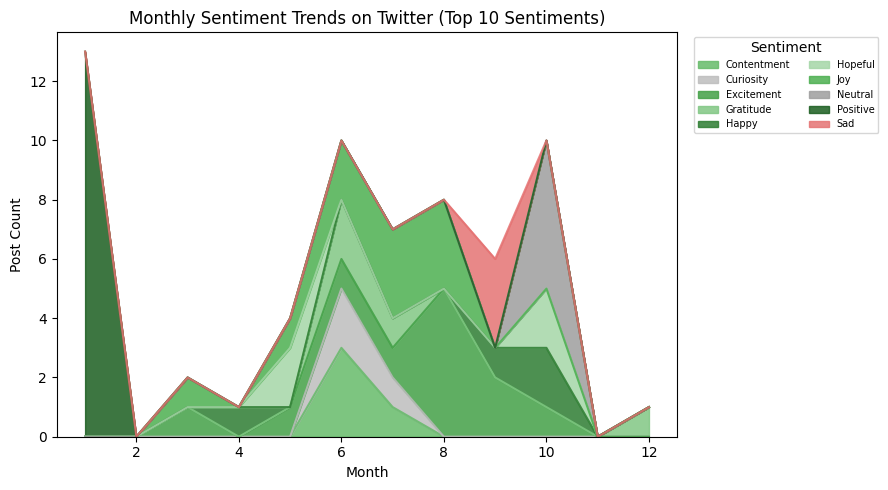

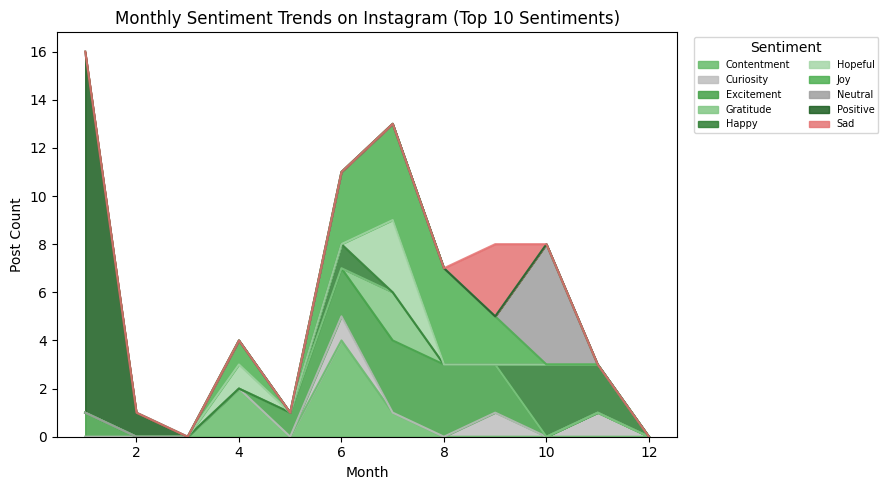

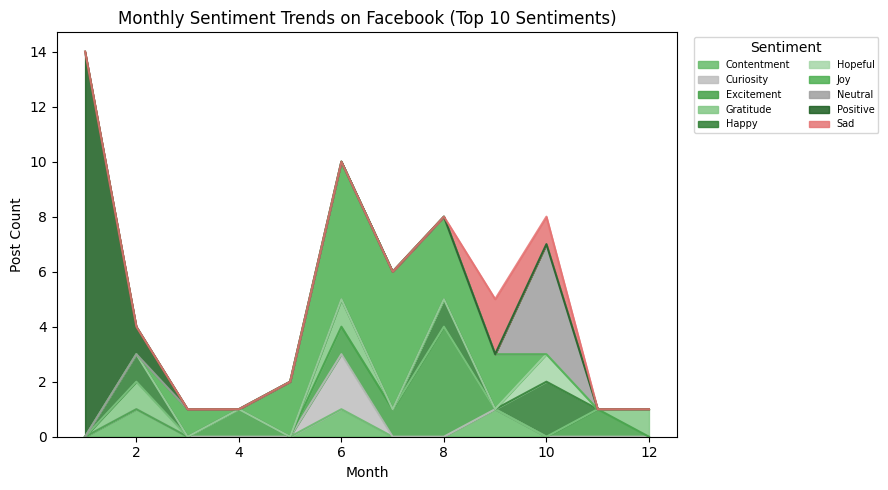

In [128]:
# --- Normalize sentiment labels once (avoids case/space mismatches) ---
df_platform["Sentiment_norm"] = df_platform["Sentiment"].astype(str).str.strip().str.title()

# --- Extract month (1..12) ---
df_platform["Month"] = pd.to_datetime(df_platform["Timestamp"], errors="coerce").dt.month

# --- Plot monthly sentiment trends per platform with consistent colors ---
for platform in df_platform["Platform"].unique():
    sub = df_platform[df_platform["Platform"] == platform]

    monthly = (
        sub.groupby(["Month", "Sentiment_norm"])
           .size()
           .reset_index(name="Count")
    )

    # Pivot to wide; ensure months appear 1..12 in order
    pivot_month = monthly.pivot_table(
        index="Month", columns="Sentiment_norm", values="Count", fill_value=0
    ).reindex(range(1, 13), fill_value=0)

    # Build color list matching the pivot column order
    col_order = list(pivot_month.columns)
    color_list = [sentiment_colors.get(col, '#CCCCCC') for col in col_order]

    # Area plot with our palette
    ax = pivot_month.plot(
        kind="area",
        alpha=0.85,
        figsize=(9, 5),
        color=color_list
    )
    ax.set_title(f"Monthly Sentiment Trends on {platform} (Top 10 Sentiments)")
    ax.set_xlabel("Month")
    ax.set_ylabel("Post Count")

    # Legend consistent with column order
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title="Sentiment", fontsize=7, ncol=2, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


as expected, positive, joy, excitment are leading sentiments across platforms.
nothing really stands out here


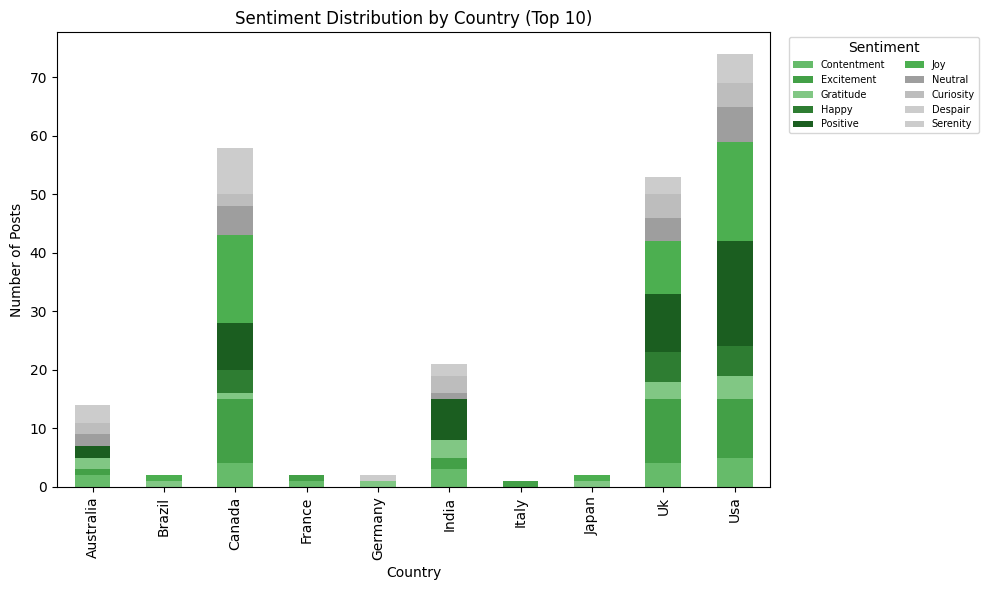

'\nTop three countries, positive sentiment distribution is the highest across all three \ncountries, with words such as positive, joy, and excitement taking the lead\n'

In [129]:
# --- Normalize sentiment labels to match color keys ---
df["Sentiment_norm"] = df["Sentiment"].astype(str).str.strip().str.title()

# Clean Country column
df["Country"] = df["Country"].astype(str).str.strip().str.title()

# Keep only top 10 countries (most posts)
top_countries = df["Country"].value_counts().head(10).index
df_geo = df[df["Country"].isin(top_countries)].copy()

# Keep only top 10 sentiments for readability (use normalized field)
top10_sentiments = df["Sentiment_norm"].value_counts().head(10).index
df_geo = df_geo[df_geo["Sentiment_norm"].isin(top10_sentiments)].copy()

# --- 3) Sentiment distribution by country (Top 10) ---
country_sentiment = (
    df_geo.groupby(["Country", "Sentiment_norm"])
          .size()
          .unstack(fill_value=0)
)

# Order columns to a consistent mood order & build matching colors
ordered_cols = [s for s in sentiment_colors.keys() if s in country_sentiment.columns]
# (If any other sentiments remain, append them at the end)
ordered_cols += [s for s in country_sentiment.columns if s not in ordered_cols]

color_list = [sentiment_colors.get(s, "#CCCCCC") for s in ordered_cols]

# Plot stacked bars with our palette
ax = country_sentiment[ordered_cols].plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=color_list
)

ax.set_title("Sentiment Distribution by Country (Top 10)")
ax.set_xlabel("Country")
ax.set_ylabel("Number of Posts")
ax.legend(title="Sentiment", fontsize=7, ncol=2, bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


'''
Top three countries, positive sentiment distribution is the highest across all three 
countries, with words such as positive, joy, and excitement taking the lead
'''

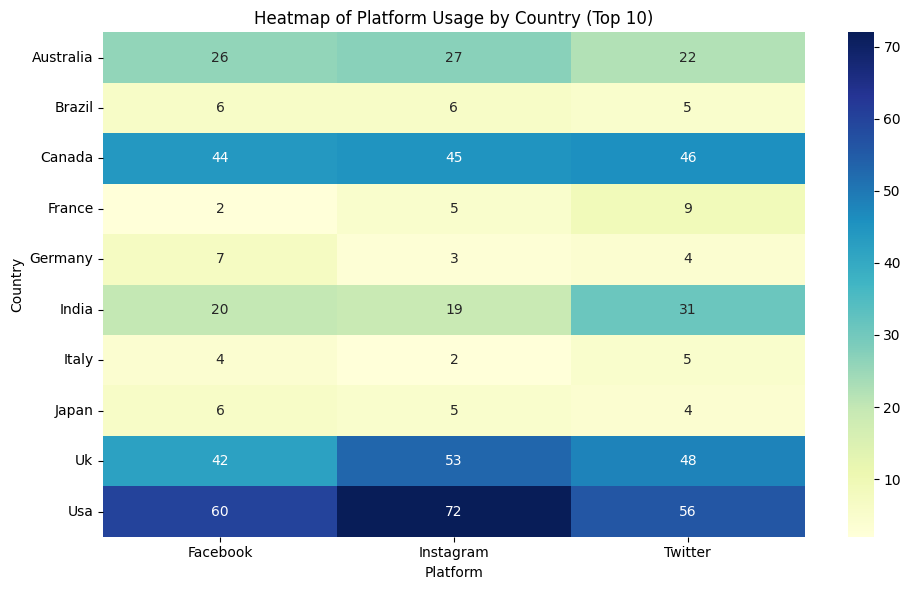

' Instagram is the number one platform used across the top three countries and majority of the other Top 10s\nHowever, India has Twitter as the most used platform'

In [130]:

# --- 4) platform usage by country TOP 10 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clean up text columns
df["Country"] = df["Country"].astype(str).str.strip().str.title()
df["Platform"] = df["Platform"].astype(str).str.strip().str.title()

# Focus on top 10 countries (most posts)
top_countries = df["Country"].value_counts().head(10).index
df_country_platform = df[df["Country"].isin(top_countries)].copy()

heat_data = (
    df_country_platform.groupby(["Country", "Platform"])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10,6))
sns.heatmap(heat_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Heatmap of Platform Usage by Country (Top 10)")
plt.xlabel("Platform")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

''' Instagram is the number one platform used across the top three countries and majority of the other Top 10s
However, India has Twitter as the most used platform'''




WILL ADD ENGAGEMENT (LIKES + RETWEETS) BOX PLOT LATER 